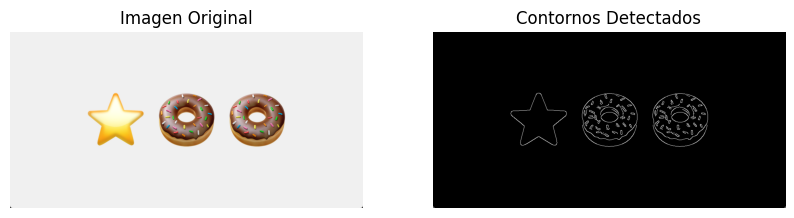

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread("captura_ventana.png")

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar un filtro de desenfoque para reducir el ruido
desenfoque = cv2.GaussianBlur(gris, (5, 5), 0)

# Detectar los bordes usando el algoritmo Canny
bordes = cv2.Canny(desenfoque, 50, 150)

# Mostrar la imagen original y los bordes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contornos Detectados')
plt.imshow(bordes, cmap='gray')
plt.axis('off')
plt.show()


In [5]:
import cv2
import numpy as np

# Cargar y preprocesar la imagen
imagen = cv2.imread("captura_ventana.png", cv2.IMREAD_GRAYSCALE)
desenfoque = cv2.GaussianBlur(imagen, (5, 5), 0)
bordes = cv2.Canny(desenfoque, 50, 150)

# Encontrar los contornos
contornos, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia de la imagen para dibujar los contornos
imagen_con_margen = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

# Dibujar el contorno exterior con margen adicional
for contorno in contornos:
    # Calcular la convex hull (envolvente convexa) para asegurar un contorno exterior simple
    hull = cv2.convexHull(contorno)

    # Aplicar una dilatación para añadir margen
    mask = np.zeros_like(bordes)
    cv2.drawContours(mask, [hull], -1, (255), thickness=cv2.FILLED)  # Rellenar la figura
    kernel = np.ones((15, 15), np.uint8)  # Tamaño del margen
    dilatado = cv2.dilate(mask, kernel, iterations=1)  # Expande el contorno

    # Dibujar el borde dilatado sobre la imagen original
    imagen_con_margen[dilatado == 255] = (0, 0, 255)  # Marcar con color (rojo en este caso)

# Mostrar el resultado
cv2.imshow("Contorno exterior con margen", imagen_con_margen)
cv2.waitKey(0)
cv2.destroyAllWindows()
